In [1]:
from astropy.io import fits
import os
from sklearn import preprocessing
import shutil
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler
from astropy import units as u
from specutils import Spectrum1D

In [56]:
path = 'C:/Users/Admin/reflex_end_products/dis/'
dates = []
with open(path+'Dised') as file:
    for line in file:
        line = line.strip('\n')
        line = path+line
        hdul = fits.open(line)
        dates.append(hdul[0].header['MJD-OBS'])
        hdul.close()
print(dates)

[53922.41614803, 53922.42368966, 53930.39187163, 53930.39944664, 53934.37605631, 53934.38380085, 53944.39036646, 53944.39798574, 53946.40330577, 53946.41090446, 53948.32831947, 53948.33593888, 53956.30464021, 53956.31226108, 53957.29683142, 53957.30437161, 53969.38242761, 53969.39008191, 53969.39806077, 53969.40564434, 53979.13629767, 53979.14382579, 53980.17755353, 53980.18511695, 53981.13298295, 53981.14056581, 53981.19834988, 53981.20587685]


In [57]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

phases = foldMeth(dates, 9.98/24)
cnt = 0
for el in phases:
    print(cnt, "---", el)
    cnt = cnt+1

0 --- 0.1450453627281141
1 --- 0.1631815470850752
2 --- 0.32514219639709924
3 --- 0.3433586533119779
4 --- 0.9063478396764074
5 --- 0.924971983969848
6 --- 0.9888572184432425
7 --- 0.007180136273603864
8 --- 0.8295930340654685
9 --- 0.8478664368648131
10 --- 0.45888449699605793
11 --- 0.47720772746618173
12 --- 0.6404173386867396
13 --- 0.6587440801636486
14 --- 0.026448304597652315
15 --- 0.04458102604788625
16 --- 0.09000627654683935
17 --- 0.10841341082306247
18 --- 0.12760105009637734
19 --- 0.14583809217386776
20 --- 0.5462068216401602
21 --- 0.5643105170412366
22 --- 0.05022892984491633
23 --- 0.06841751502454467
24 --- 0.34785478958278665
25 --- 0.3660901242394452
26 --- 0.5050498116115213
27 --- 0.5231507414779747


In [58]:
path = 'C:/Users/Admin/reflex_end_products/dis/'
fluxes = []
wavels = []
count = 0
with open(path+'Dised') as file:
    for line in file:
        line = line.strip('\n')
        line = path+line
        wvl, flx = pyasl.read1dFitsSpec(line)
        flx = flx/np.median(flx)
        if count == 0:
            fluxes = flx
            wavels = wvl
            
        else:
            fluxes = np.vstack((fluxes, flx))
            wavels = np.vstack((wavels, wvl))
        count = count+1
        
        #plt.plot(wvl, flx+(count*10**(-15)))

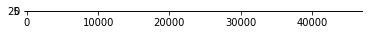

In [59]:
plt.imshow(fluxes)

In [60]:
len(new_disp_grid)

NameError: name 'new_disp_grid' is not defined

In [61]:
np.shape(fluxes)

(28, 47000)

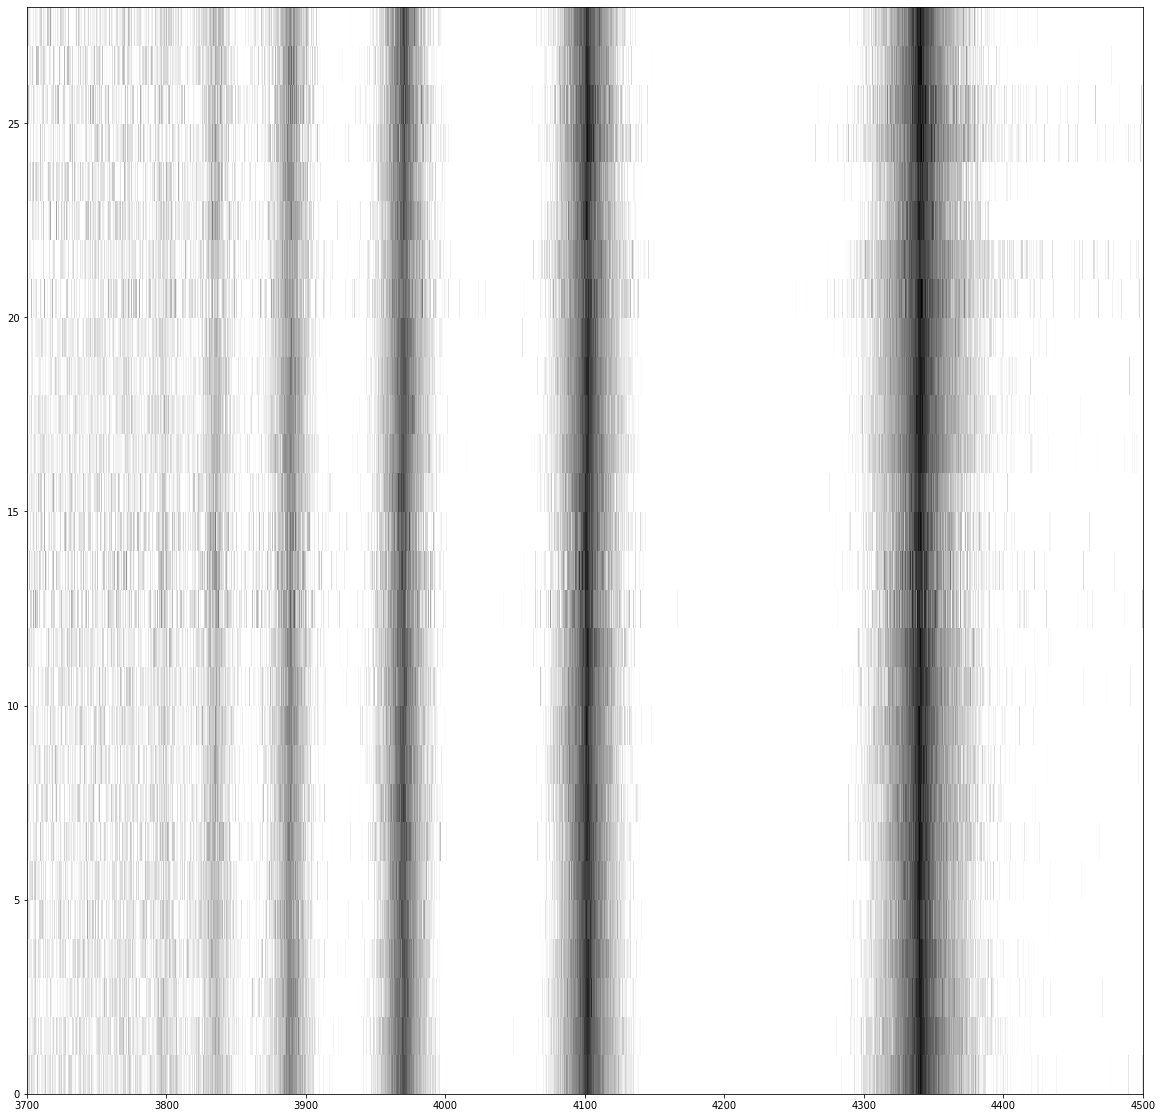

In [72]:

X,Y = np.meshgrid(wvl, np.linspace(0,28,29))

plt.figure(figsize=(20,20))
plt.pcolormesh(X,Y,fluxes,vmin=0.3, vmax=1.0, cmap='gray',rasterized=True)
plt.xlim(3700,4500)
plt.savefig('GD1400BlueTrail.pdf')

(4300, 4380)

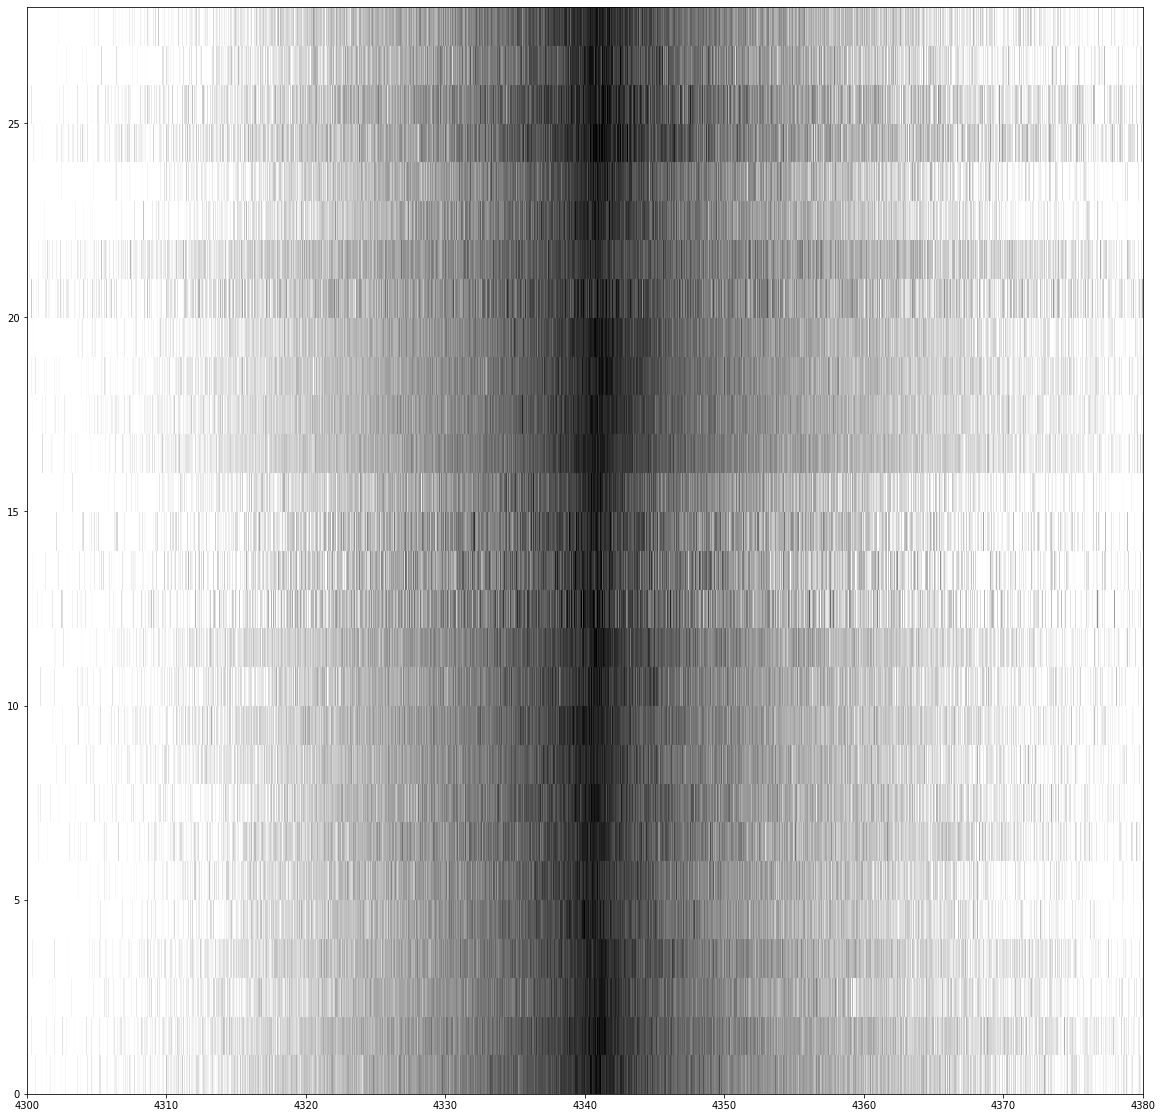

In [63]:

X,Y = np.meshgrid(wvl, np.linspace(0,28,29))

plt.figure(figsize=(20,20))
plt.pcolormesh(X,Y,fluxes,vmin=0.3, vmax=0.9, cmap='gray')
plt.xlim(4300,4380)

(4300, 4380)

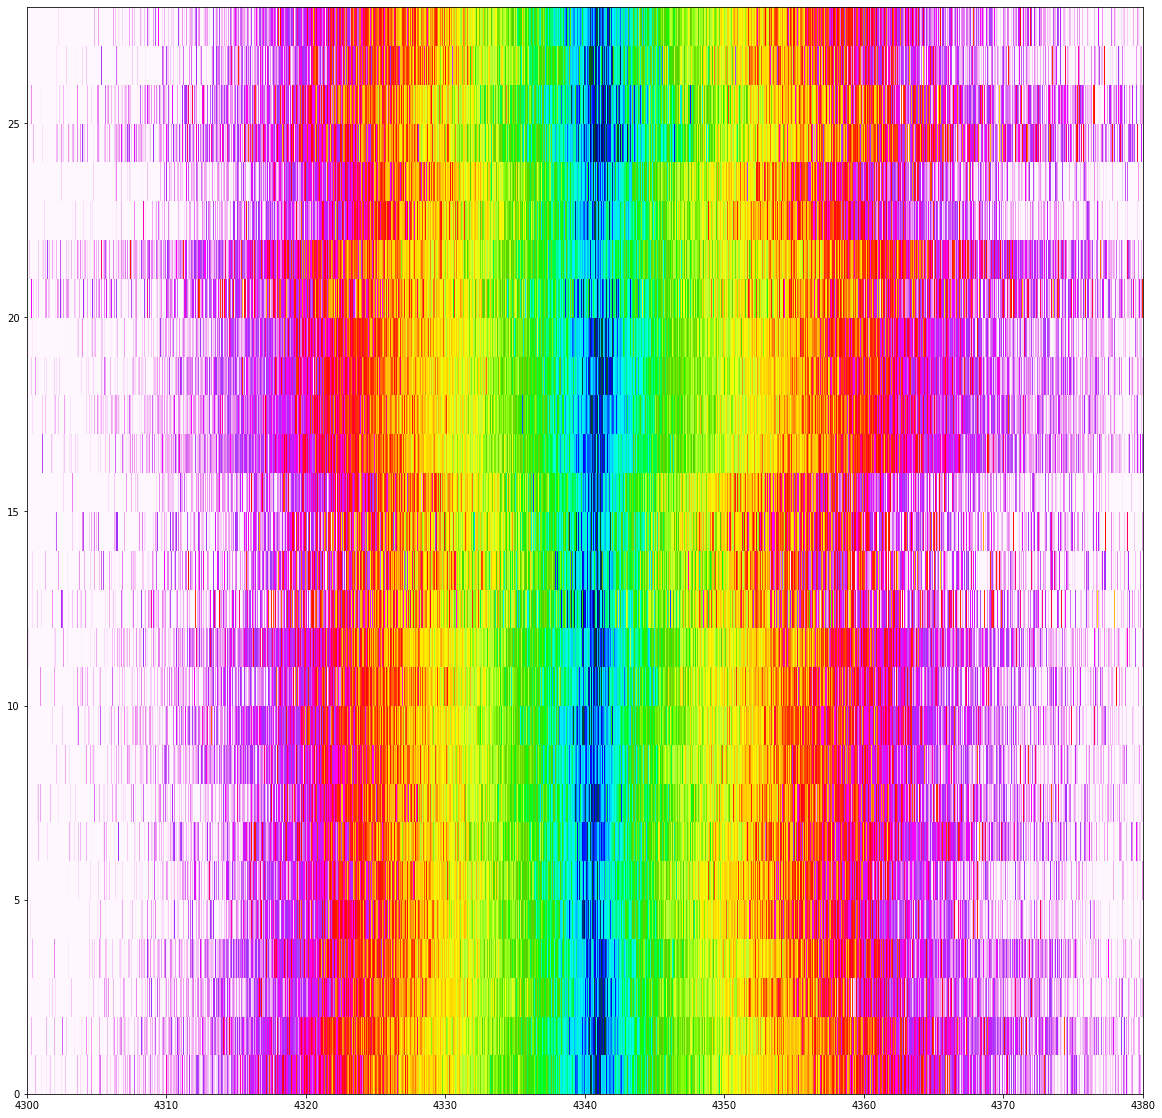

In [64]:

X,Y = np.meshgrid(wvl, np.linspace(0,28,29))

plt.figure(figsize=(20,20))
plt.pcolormesh(X,Y,fluxes,vmin=0.3, vmax=0.9, cmap='gist_ncar')
plt.xlim(4300,4380)

In [65]:
phasedStack = (fluxes[7]+fluxes[14]+fluxes[15]+fluxes[16]+fluxes[22]+fluxes[23])/6
tmp = (fluxes[0]+fluxes[1]+fluxes[17]+fluxes[18]+fluxes[19])/5
phasedStack = np.vstack((phasedStack, tmp))
tmp = np.zeros_like(fluxes[0])
phasedStack = np.vstack((phasedStack, tmp))
tmp = (fluxes[2]+fluxes[3]+fluxes[24]+fluxes[25])/4
phasedStack = np.vstack((phasedStack, tmp))
tmp = (fluxes[10]+fluxes[11])/2
phasedStack = np.vstack((phasedStack, tmp))
tmp = (fluxes[20]+fluxes[21]+fluxes[26]+fluxes[27])/4
phasedStack = np.vstack((phasedStack, tmp))
tmp = (fluxes[12]+fluxes[13])/2
phasedStack = np.vstack((phasedStack, tmp))
tmp = np.zeros_like(fluxes[0])
phasedStack = np.vstack((phasedStack, tmp))
tmp = (fluxes[8]+fluxes[9])/2
phasedStack = np.vstack((phasedStack, tmp))
tmp = (fluxes[4]+fluxes[5]+fluxes[6])/3
phasedStack = np.vstack((phasedStack, tmp))

(3700, 4500)

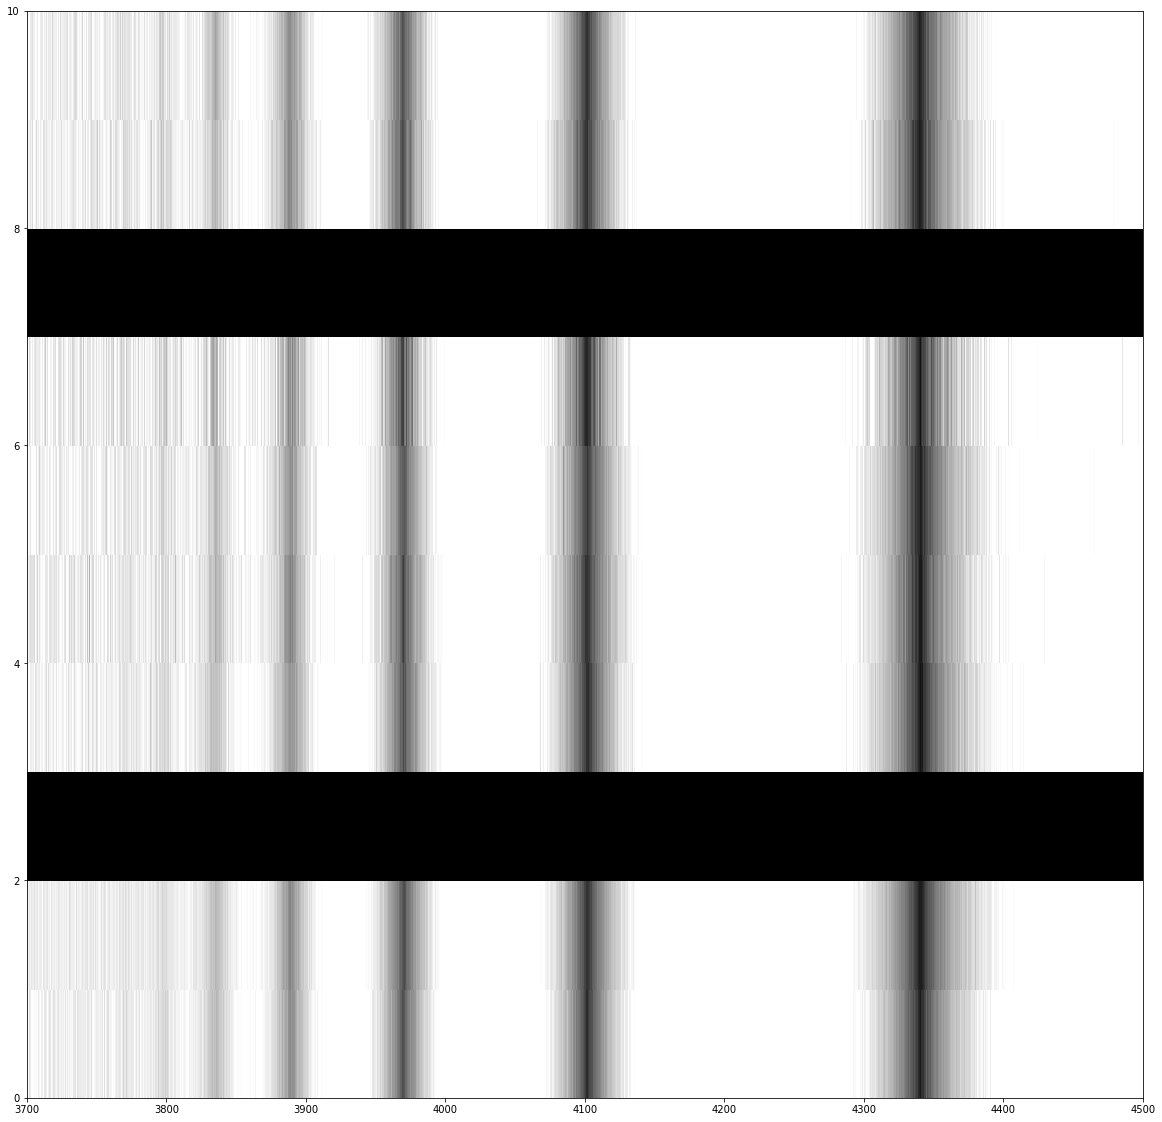

In [66]:

X,Y = np.meshgrid(wvl, np.linspace(0,10,11))

plt.figure(figsize=(20,20))
plt.pcolormesh(X,Y,phasedStack,vmin=0.3, vmax=1.0, cmap='gray')
plt.xlim(3700,4500)

(4300, 4380)

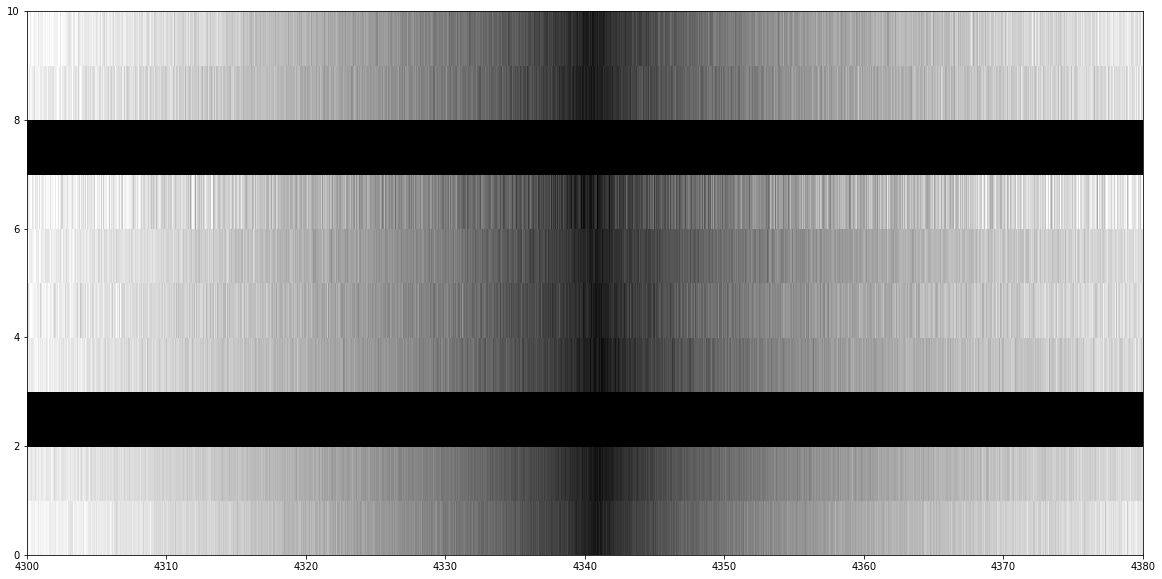

In [67]:
X,Y = np.meshgrid(wvl, np.linspace(0,10,11))

plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStack,vmin=0.3, vmax=1.0, cmap='gray')
plt.xlim(4300,4380)

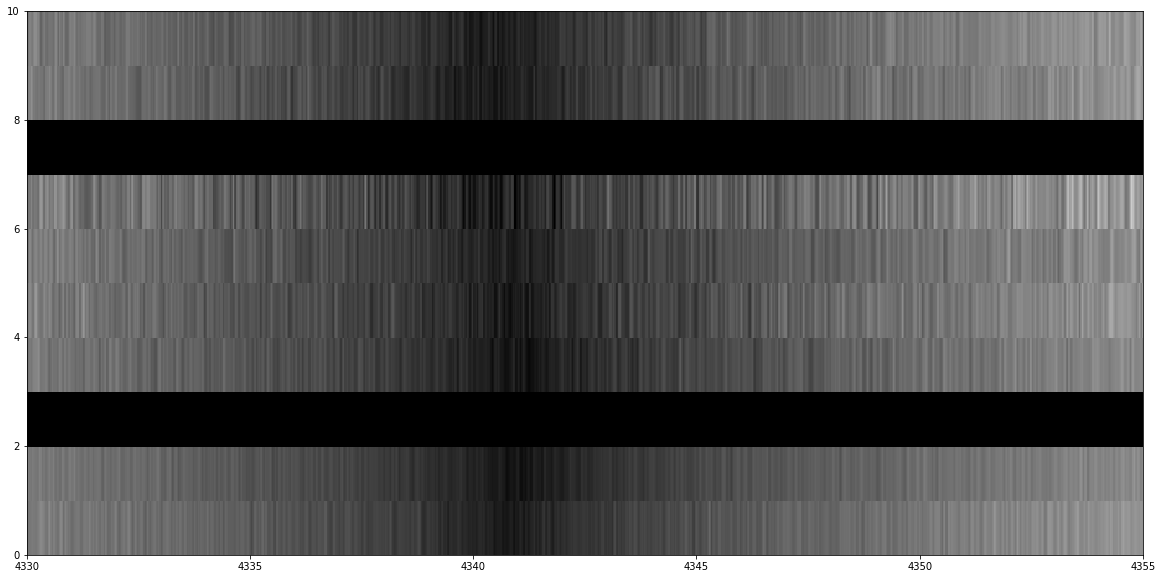

In [73]:
X,Y = np.meshgrid(wvl, np.linspace(0,10,11))

plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStack,vmin=0.3, vmax=1.0, cmap='gray',rasterized=True)
plt.xlim(4330,4355)
plt.savefig('GD1400Gamma.pdf')

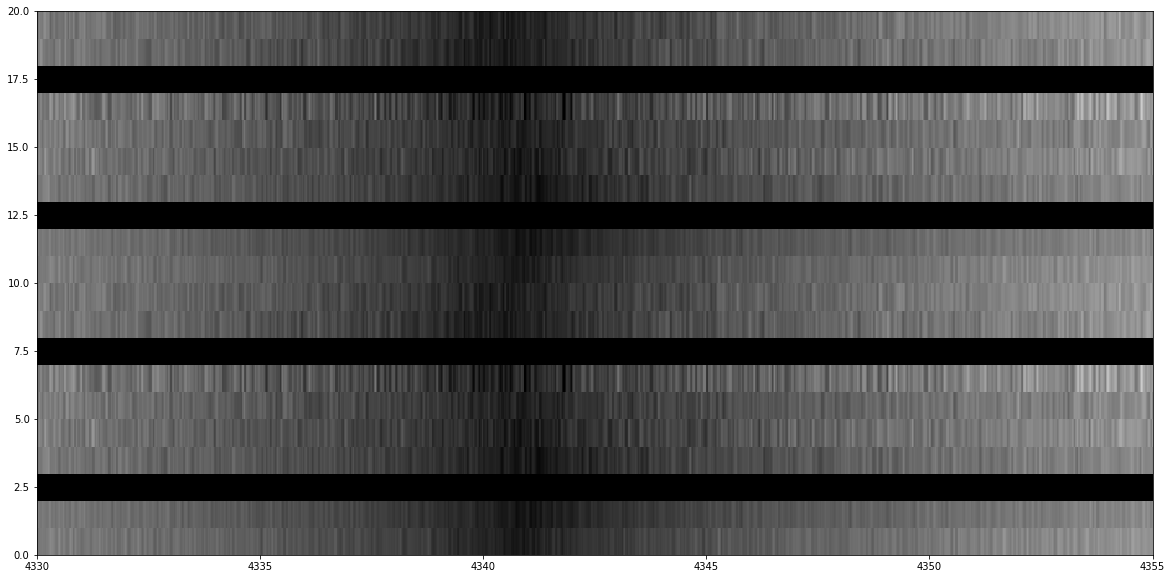

In [74]:
X,Y = np.meshgrid(wvl, np.linspace(0,20,21))
phasedStackD = np.vstack((phasedStack,phasedStack))
plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStackD,vmin=0.3, vmax=1.0, cmap='gray',rasterized=True)
plt.xlim(4330,4355)
plt.savefig('GD1400Gamma.pdf')

In [75]:
path = 'C:/Users/Admin/reflex_end_products/ReflexRed/REDU/'
datesREDU = []
with open(path+'REDUout') as file:
    for line in file:
        line = line.strip('\n')
        line = path+line
        hdul = fits.open(line)
        datesREDU.append(hdul[0].header['MJD-OBS'])
        hdul.close()
print(datesREDU)

[53946.41101427, 53948.32832771, 53948.33600551, 53956.30464886, 53956.31232721, 53957.29678251, 53957.3044612, 53965.38346609, 53965.39131206, 53965.39970359, 53922.4161563, 53965.4074947, 53969.38241729, 53969.3901488, 53969.39797256, 53969.4057109, 53979.13628734, 53979.14394094, 53980.17757397, 53980.18519006, 53981.13295396, 53922.42380979, 53981.14062817, 53981.19836423, 53981.20604041, 53930.39184669, 53930.39950656, 53934.37602735, 53934.3838803, 53944.39037447, 53944.39806244, 53946.40331402]


In [76]:
phases = foldMeth(datesREDU, 9.98/24)
cnt = 0
for el in phases:
    print(cnt, "---", el)
    cnt = cnt+1

0 --- 0.8481305090181869
1 --- 0.4589043126277297
2 --- 0.47736795992289066
3 --- 0.640438140290864
4 --- 0.6589031102238895
5 --- 0.0263306853629253
6 --- 0.044796472944446164
7 --- 0.47326514629562216
8 --- 0.4921332104103584
9 --- 0.5123132424879789
10 --- 0.14506525050112437
11 --- 0.5310493787467846
12 --- 0.08998145891156585
13 --- 0.10857426852803446
14 --- 0.127388921841365
15 --- 0.1459981563066194
16 --- 0.5461819799636063
17 --- 0.564587430860278
18 --- 0.05027808416737449
19 --- 0.06859333065776098
20 --- 0.34778507413899706
21 --- 0.16347043687372256
22 --- 0.3662400881648773
23 --- 0.5050843206298666
24 --- 0.5235440721352751
25 --- 0.32508222043643964
26 --- 0.34350274950275217
27 --- 0.9062781963914536
28 --- 0.9251630460966624
29 --- 0.9888764809679897
30 --- 0.007364585176100936
31 --- 0.8296128737384207


In [77]:
path = 'C:/Users/Admin/reflex_end_products/ReflexRed/REDU/'
fluxesREDU = []
wavelsREDU = []
count = 0
with open(path+'REDUout') as file:
    for line in file:
        line = line.strip('\n')
        line = path+line
        wvl, flx = pyasl.read1dFitsSpec(line)
        flx = flx/np.median(flx)
        if count == 0:
            fluxesREDU = flx
            wavelsREDU = wvl
            
        else:
            fluxesREDU = np.vstack((fluxesREDU, flx))
            wavelsREDU = np.vstack((wavelsREDU, wvl))
        count = count+1
        
        #plt.plot(wvl, flx+(count*10**(-15)))

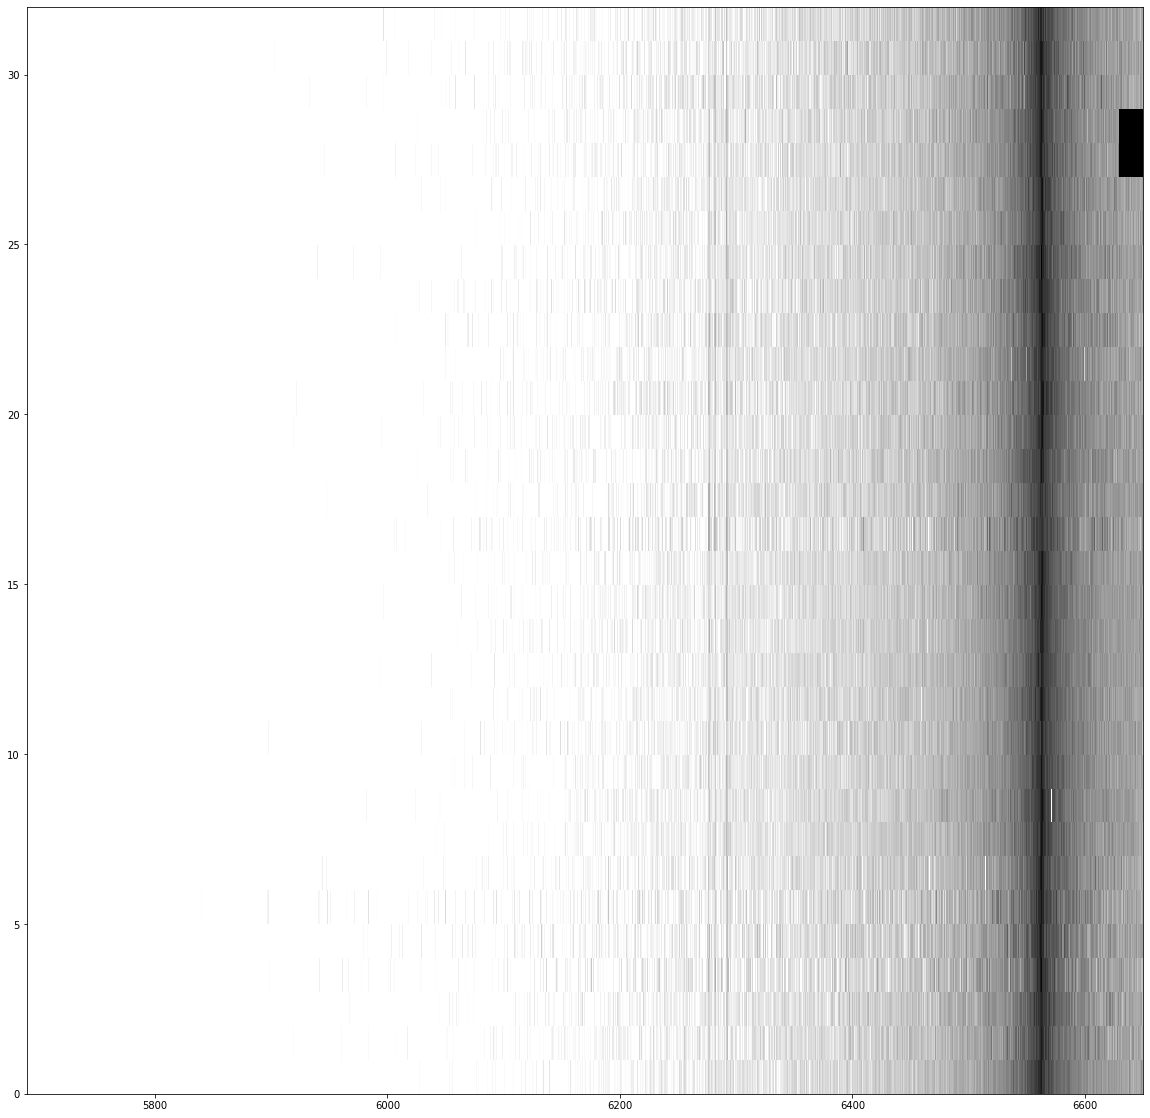

In [16]:

X,Y = np.meshgrid(wvl, np.linspace(0,32,33))

plt.figure(figsize=(20,20))
plt.pcolormesh(X,Y,fluxesREDU,vmin=0.3, vmax=1.0, cmap='gray')
#plt.xlim(3700,4500)

(5690.0, 6649.999999999991)

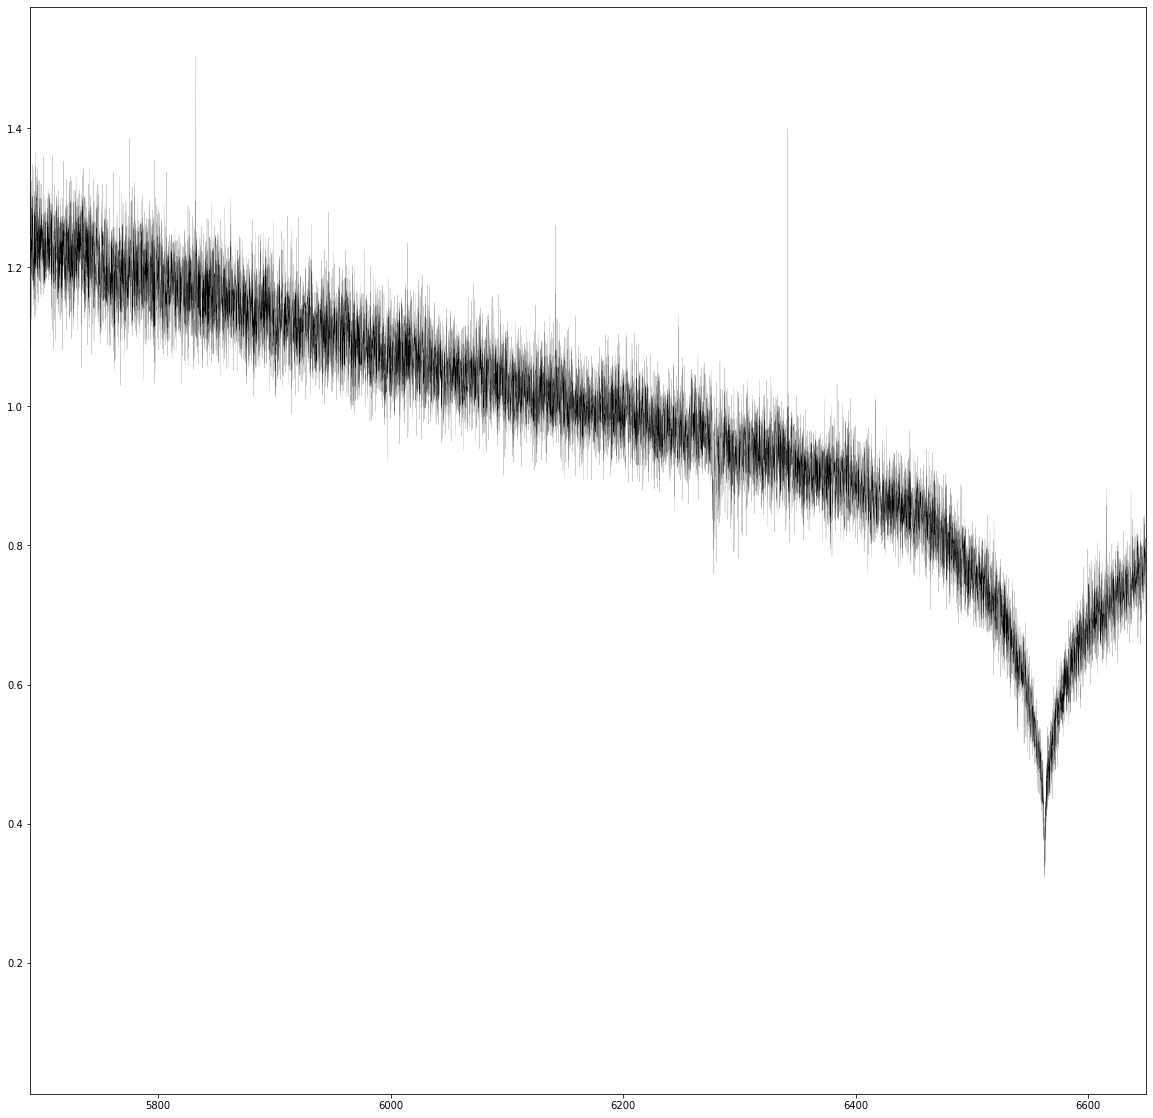

In [24]:
plt.figure(figsize=(20,20))
plt.plot(wvl,flx,lw=0.1,c='k')
plt.xlim(wvl[0],wvl[-1])

In [25]:
phasedStackREDU = (fluxesREDU[5]+fluxesREDU[6]+fluxesREDU[12]+fluxesREDU[18]+fluxesREDU[19]+fluxesREDU[30])/6
tmp = (fluxesREDU[10]+fluxesREDU[13]+fluxesREDU[14]+fluxesREDU[15]+fluxesREDU[21])/5
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = np.zeros_like(phasedStackREDU[0])
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = (fluxesREDU[20]+fluxesREDU[22]+fluxesREDU[25]+fluxesREDU[26])/4
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = (fluxesREDU[1]+fluxesREDU[2]+fluxesREDU[7]+fluxesREDU[8])/4
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = (fluxesREDU[9]+fluxesREDU[11]+fluxesREDU[16]+fluxesREDU[17]+fluxesREDU[23]+fluxesREDU[24])/6
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = (fluxesREDU[3]+fluxesREDU[4])/2
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = np.zeros_like(fluxesREDU[0])
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = (fluxesREDU[0]+fluxesREDU[31])/2
phasedStackREDU = np.vstack((phasedStackREDU, tmp))
tmp = (fluxesREDU[27]+fluxesREDU[28]+fluxesREDU[29])/3
phasedStackREDU = np.vstack((phasedStackREDU, tmp))

(6525, 6600)

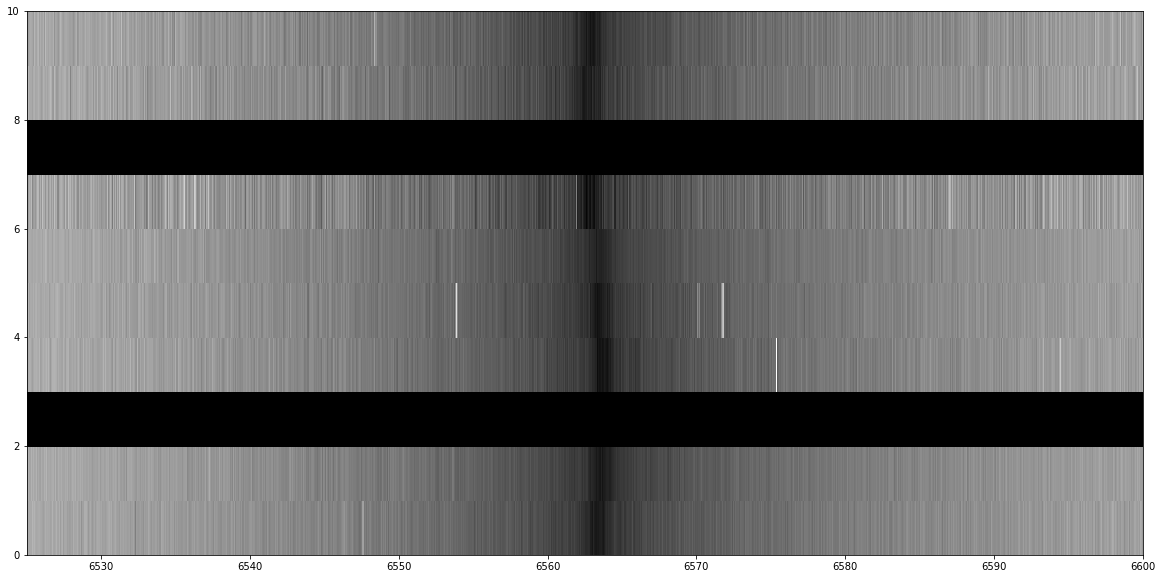

In [39]:
X,Y = np.meshgrid(wvl, np.linspace(0,10,11))

plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStackREDU,vmin=0.3, vmax=0.9, cmap='gray')
plt.xlim(6525,6600)

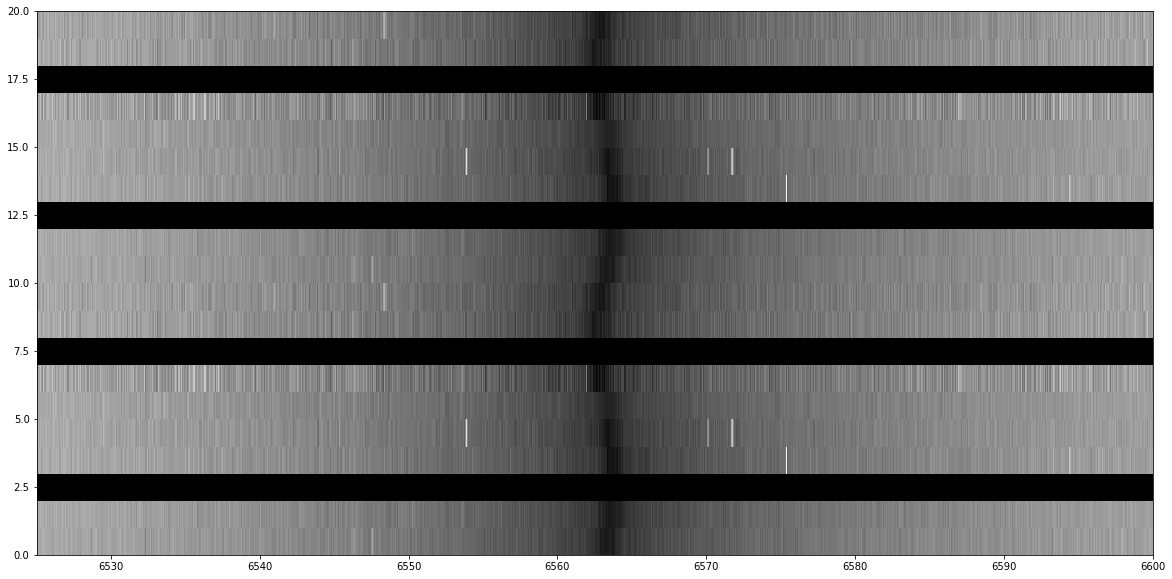

In [78]:
X,Y = np.meshgrid(wvl, np.linspace(0,20,21))
phasedStackREDUD = np.vstack((phasedStackREDU,phasedStackREDU))
plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStackREDUD,vmin=0.3, vmax=0.9, cmap='gray',rasterized=True)
plt.xlim(6525,6600)
plt.savefig('GD1400Alpha.pdf')

In [79]:
path = 'C:/Users/Admin/reflex_end_products/ReflexRed/REDL/'
datesREDL = []
with open(path+'REDLout') as file:
    for line in file:
        line = line.strip('\n')
        line = path+line
        hdul = fits.open(line)
        datesREDL.append(hdul[0].header['MJD-OBS'])
        hdul.close()
print(datesREDL)

[53946.41101427, 53948.32832771, 53948.33600551, 53956.30464886, 53956.31232721, 53957.29678251, 53957.3044612, 53965.38346609, 53965.39131206, 53965.39970359, 53922.4161563, 53965.4074947, 53969.38241729, 53969.3901488, 53969.39797256, 53969.4057109, 53979.13628734, 53979.14394094, 53980.17757397, 53980.18519006, 53981.13295396, 53922.42380979, 53981.14062817, 53981.19836423, 53981.20604041, 53930.39184669, 53930.39950656, 53934.37602735, 53934.3838803, 53944.39037447, 53944.39806244, 53946.40331402]


In [80]:
phases = foldMeth(datesREDU, 9.98/24)
cnt = 0
for el in phases:
    print(cnt, "---", el)
    cnt = cnt+1

0 --- 0.8481305090181869
1 --- 0.4589043126277297
2 --- 0.47736795992289066
3 --- 0.640438140290864
4 --- 0.6589031102238895
5 --- 0.0263306853629253
6 --- 0.044796472944446164
7 --- 0.47326514629562216
8 --- 0.4921332104103584
9 --- 0.5123132424879789
10 --- 0.14506525050112437
11 --- 0.5310493787467846
12 --- 0.08998145891156585
13 --- 0.10857426852803446
14 --- 0.127388921841365
15 --- 0.1459981563066194
16 --- 0.5461819799636063
17 --- 0.564587430860278
18 --- 0.05027808416737449
19 --- 0.06859333065776098
20 --- 0.34778507413899706
21 --- 0.16347043687372256
22 --- 0.3662400881648773
23 --- 0.5050843206298666
24 --- 0.5235440721352751
25 --- 0.32508222043643964
26 --- 0.34350274950275217
27 --- 0.9062781963914536
28 --- 0.9251630460966624
29 --- 0.9888764809679897
30 --- 0.007364585176100936
31 --- 0.8296128737384207


In [81]:
path = 'C:/Users/Admin/reflex_end_products/ReflexRed/REDL/'
fluxesREDL = []
wavelsREDL = []
count = 0
with open(path+'REDLout') as file:
    for line in file:
        line = line.strip('\n')
        line = path+line
        wvl, flx = pyasl.read1dFitsSpec(line)
        flx = flx/np.median(flx)
        if count == 0:
            fluxesREDL = flx
            wavelsREDL = wvl
            
        else:
            fluxesREDL = np.vstack((fluxesREDL, flx))
            wavelsREDL = np.vstack((wavelsREDL, wvl))
        count = count+1
        
        #plt.plot(wvl, flx+(count*10**(-15)))

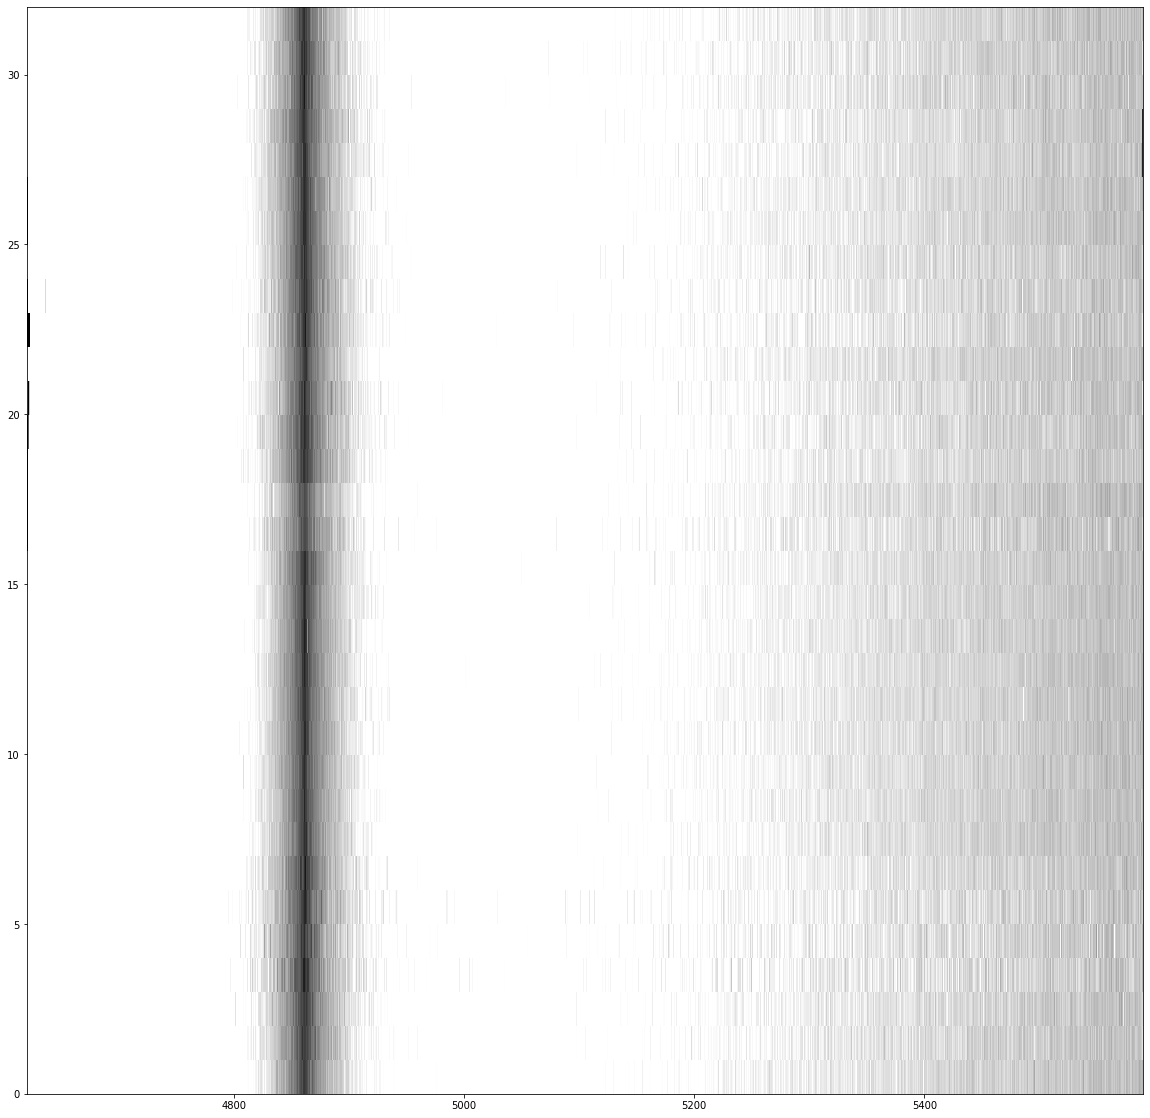

In [44]:

X,Y = np.meshgrid(wvl, np.linspace(0,32,33))

plt.figure(figsize=(20,20))
plt.pcolormesh(X,Y,fluxesREDL,vmin=0.3, vmax=1.0, cmap='gray')
#plt.xlim(3700,4500)

In [45]:
phasedStackREDL = (fluxesREDL[5]+fluxesREDL[6]+fluxesREDL[12]+fluxesREDL[18]+fluxesREDL[19]+fluxesREDL[30])/6
tmp = (fluxesREDL[10]+fluxesREDL[13]+fluxesREDL[14]+fluxesREDL[15]+fluxesREDL[21])/5
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = np.zeros_like(phasedStackREDL[0])
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = (fluxesREDL[20]+fluxesREDL[22]+fluxesREDL[25]+fluxesREDL[26])/4
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = (fluxesREDL[1]+fluxesREDL[2]+fluxesREDL[7]+fluxesREDL[8])/4
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = (fluxesREDL[9]+fluxesREDL[11]+fluxesREDL[16]+fluxesREDL[17]+fluxesREDL[23]+fluxesREDL[24])/6
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = (fluxesREDL[3]+fluxesREDL[4])/2
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = np.zeros_like(fluxesREDL[0])
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = (fluxesREDL[0]+fluxesREDL[31])/2
phasedStackREDL = np.vstack((phasedStackREDL, tmp))
tmp = (fluxesREDL[27]+fluxesREDL[28]+fluxesREDL[29])/3
phasedStackREDL = np.vstack((phasedStackREDL, tmp))

(4850, 4875)

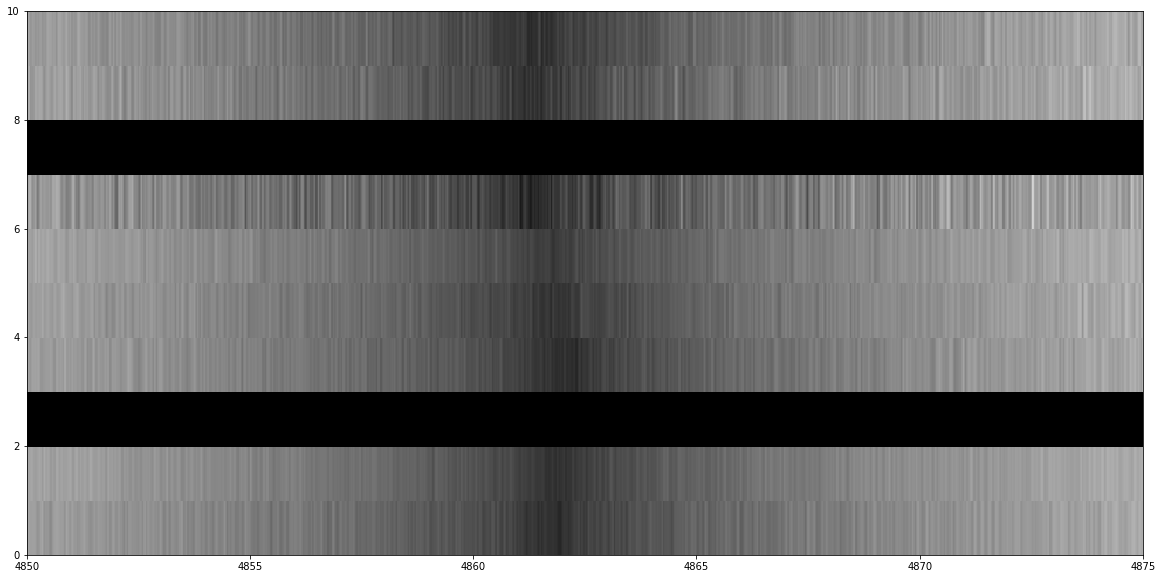

In [49]:
X,Y = np.meshgrid(wvl, np.linspace(0,10,11))

plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStackREDL,vmin=0.3, vmax=0.9, cmap='gray')
plt.xlim(4850,4875)

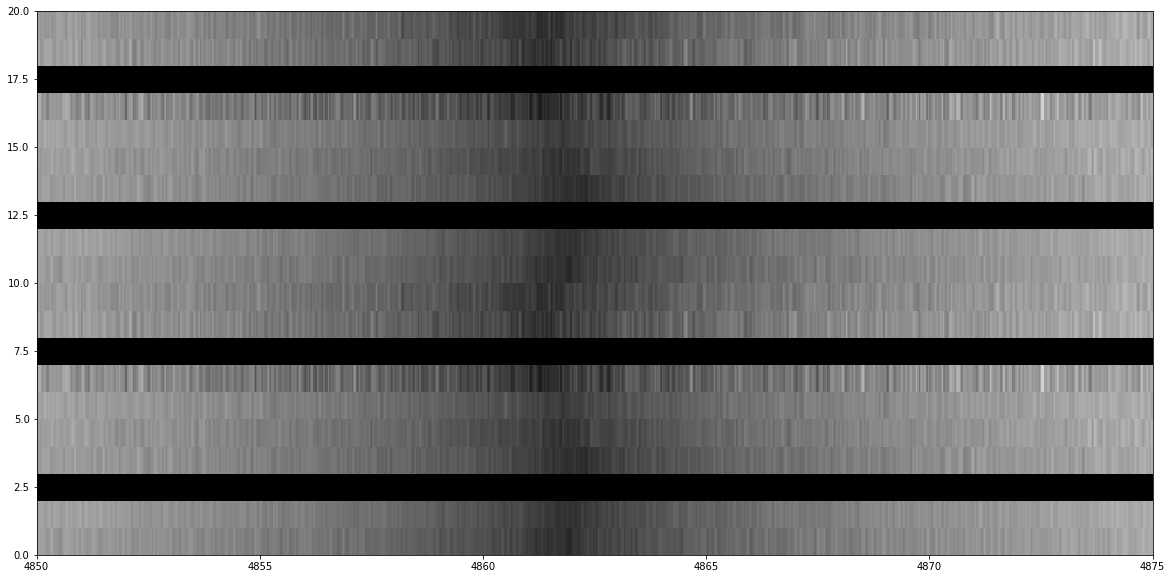

In [82]:
X,Y = np.meshgrid(wvl, np.linspace(0,20,21))
phasedStackREDLD = np.vstack((phasedStackREDL,phasedStackREDL))
plt.figure(figsize=(20,10))
plt.pcolormesh(X,Y,phasedStackREDLD,vmin=0.3, vmax=0.9, cmap='gray', rasterized=True)
plt.xlim(4850,4875)
plt.savefig('GD1400Beta.pdf')